## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.9ms	remaining: 49.8s
1:	learn: 0.9301086	total: 52.1ms	remaining: 26s
2:	learn: 0.9005637	total: 54.3ms	remaining: 18s
3:	learn: 0.8720983	total: 56.5ms	remaining: 14.1s
4:	learn: 0.8467410	total: 58.4ms	remaining: 11.6s
5:	learn: 0.8226672	total: 60.3ms	remaining: 9.99s
6:	learn: 0.7994702	total: 62.1ms	remaining: 8.81s
7:	learn: 0.7784272	total: 63.9ms	remaining: 7.93s
8:	learn: 0.7602192	total: 66ms	remaining: 7.26s
9:	learn: 0.7412421	total: 68ms	remaining: 6.73s
10:	learn: 0.7247930	total: 70.4ms	remaining: 6.33s
11:	learn: 0.7089951	total: 72.7ms	remaining: 5.98s
12:	learn: 0.6951345	total: 74.6ms	remaining: 5.66s
13:	learn: 0.6809276	total: 76.5ms	remaining: 5.39s
14:	learn: 0.6692630	total: 78.4ms	remaining: 5.15s
15:	learn: 0.6588323	total: 80.3ms	remaining: 4.94s
16:	learn: 0.6472700	total: 82.2ms	remaining: 4.75s
17:	learn: 0.6379982	total: 84.1ms	remaining: 4.59s
18:	learn: 0.6294674	total: 86ms	remaining: 4.44s
19:	learn: 0.6193295	total: 88ms

53:	learn: 0.4917272	total: 153ms	remaining: 2.68s
54:	learn: 0.4895079	total: 156ms	remaining: 2.67s
55:	learn: 0.4881884	total: 157ms	remaining: 2.65s
56:	learn: 0.4861566	total: 160ms	remaining: 2.64s
57:	learn: 0.4850201	total: 161ms	remaining: 2.62s
58:	learn: 0.4840055	total: 163ms	remaining: 2.6s
59:	learn: 0.4824455	total: 165ms	remaining: 2.59s
60:	learn: 0.4809744	total: 167ms	remaining: 2.57s
61:	learn: 0.4801376	total: 169ms	remaining: 2.56s
62:	learn: 0.4792422	total: 171ms	remaining: 2.55s
63:	learn: 0.4780719	total: 173ms	remaining: 2.53s
64:	learn: 0.4771984	total: 175ms	remaining: 2.52s
65:	learn: 0.4759610	total: 177ms	remaining: 2.5s
66:	learn: 0.4750287	total: 179ms	remaining: 2.49s
67:	learn: 0.4740093	total: 180ms	remaining: 2.47s
68:	learn: 0.4732612	total: 182ms	remaining: 2.46s
69:	learn: 0.4727266	total: 184ms	remaining: 2.44s
70:	learn: 0.4716549	total: 186ms	remaining: 2.43s
71:	learn: 0.4709088	total: 188ms	remaining: 2.42s
72:	learn: 0.4697594	total: 190ms

86:	learn: 0.4583577	total: 217ms	remaining: 2.28s
87:	learn: 0.4577999	total: 219ms	remaining: 2.27s
88:	learn: 0.4572657	total: 221ms	remaining: 2.26s
89:	learn: 0.4569360	total: 223ms	remaining: 2.25s
90:	learn: 0.4559969	total: 225ms	remaining: 2.24s
91:	learn: 0.4549716	total: 227ms	remaining: 2.24s
92:	learn: 0.4544919	total: 229ms	remaining: 2.23s
93:	learn: 0.4537693	total: 230ms	remaining: 2.22s
94:	learn: 0.4532673	total: 232ms	remaining: 2.21s
95:	learn: 0.4526987	total: 234ms	remaining: 2.21s
96:	learn: 0.4520952	total: 236ms	remaining: 2.2s
97:	learn: 0.4513919	total: 238ms	remaining: 2.19s
98:	learn: 0.4503747	total: 240ms	remaining: 2.18s
99:	learn: 0.4494783	total: 242ms	remaining: 2.18s
100:	learn: 0.4487329	total: 244ms	remaining: 2.17s
101:	learn: 0.4481325	total: 246ms	remaining: 2.16s
102:	learn: 0.4475445	total: 247ms	remaining: 2.15s
103:	learn: 0.4466014	total: 249ms	remaining: 2.15s
104:	learn: 0.4461730	total: 251ms	remaining: 2.14s
105:	learn: 0.4457259	total

140:	learn: 0.4292928	total: 319ms	remaining: 1.94s
141:	learn: 0.4288053	total: 321ms	remaining: 1.94s
142:	learn: 0.4282748	total: 323ms	remaining: 1.93s
143:	learn: 0.4277528	total: 324ms	remaining: 1.93s
144:	learn: 0.4274087	total: 326ms	remaining: 1.92s
145:	learn: 0.4271984	total: 328ms	remaining: 1.92s
146:	learn: 0.4268458	total: 330ms	remaining: 1.91s
147:	learn: 0.4264987	total: 332ms	remaining: 1.91s
148:	learn: 0.4262192	total: 333ms	remaining: 1.9s
149:	learn: 0.4257966	total: 335ms	remaining: 1.9s
150:	learn: 0.4253062	total: 337ms	remaining: 1.9s
151:	learn: 0.4247446	total: 339ms	remaining: 1.89s
152:	learn: 0.4237365	total: 341ms	remaining: 1.89s
153:	learn: 0.4233079	total: 343ms	remaining: 1.88s
154:	learn: 0.4228876	total: 345ms	remaining: 1.88s
155:	learn: 0.4225404	total: 346ms	remaining: 1.87s
156:	learn: 0.4222831	total: 348ms	remaining: 1.87s
157:	learn: 0.4218088	total: 350ms	remaining: 1.86s
158:	learn: 0.4213239	total: 352ms	remaining: 1.86s
159:	learn: 0.4

174:	learn: 0.4144190	total: 382ms	remaining: 1.8s
175:	learn: 0.4140875	total: 384ms	remaining: 1.79s
176:	learn: 0.4136755	total: 385ms	remaining: 1.79s
177:	learn: 0.4133860	total: 387ms	remaining: 1.79s
178:	learn: 0.4129780	total: 389ms	remaining: 1.78s
179:	learn: 0.4122907	total: 391ms	remaining: 1.78s
180:	learn: 0.4119188	total: 393ms	remaining: 1.78s
181:	learn: 0.4115412	total: 395ms	remaining: 1.77s
182:	learn: 0.4112620	total: 397ms	remaining: 1.77s
183:	learn: 0.4107734	total: 399ms	remaining: 1.77s
184:	learn: 0.4104881	total: 401ms	remaining: 1.77s
185:	learn: 0.4100009	total: 403ms	remaining: 1.76s
186:	learn: 0.4096453	total: 405ms	remaining: 1.76s
187:	learn: 0.4093395	total: 407ms	remaining: 1.76s
188:	learn: 0.4090020	total: 409ms	remaining: 1.75s
189:	learn: 0.4085981	total: 411ms	remaining: 1.75s
190:	learn: 0.4082397	total: 413ms	remaining: 1.75s
191:	learn: 0.4079846	total: 414ms	remaining: 1.74s
192:	learn: 0.4076364	total: 416ms	remaining: 1.74s
193:	learn: 0

227:	learn: 0.3965787	total: 482ms	remaining: 1.63s
228:	learn: 0.3963073	total: 484ms	remaining: 1.63s
229:	learn: 0.3960925	total: 485ms	remaining: 1.63s
230:	learn: 0.3957018	total: 487ms	remaining: 1.62s
231:	learn: 0.3954162	total: 489ms	remaining: 1.62s
232:	learn: 0.3951665	total: 491ms	remaining: 1.62s
233:	learn: 0.3949269	total: 493ms	remaining: 1.61s
234:	learn: 0.3945894	total: 495ms	remaining: 1.61s
235:	learn: 0.3944181	total: 497ms	remaining: 1.61s
236:	learn: 0.3941497	total: 499ms	remaining: 1.6s
237:	learn: 0.3939819	total: 500ms	remaining: 1.6s
238:	learn: 0.3938322	total: 502ms	remaining: 1.6s
239:	learn: 0.3935463	total: 504ms	remaining: 1.59s
240:	learn: 0.3933166	total: 506ms	remaining: 1.59s
241:	learn: 0.3930992	total: 508ms	remaining: 1.59s
242:	learn: 0.3928898	total: 510ms	remaining: 1.59s
243:	learn: 0.3926199	total: 512ms	remaining: 1.58s
244:	learn: 0.3923955	total: 514ms	remaining: 1.58s
245:	learn: 0.3922312	total: 515ms	remaining: 1.58s
246:	learn: 0.3

261:	learn: 0.3882459	total: 545ms	remaining: 1.53s
262:	learn: 0.3881101	total: 548ms	remaining: 1.53s
263:	learn: 0.3879324	total: 549ms	remaining: 1.53s
264:	learn: 0.3876861	total: 551ms	remaining: 1.53s
265:	learn: 0.3874255	total: 553ms	remaining: 1.53s
266:	learn: 0.3868515	total: 555ms	remaining: 1.52s
267:	learn: 0.3866114	total: 557ms	remaining: 1.52s
268:	learn: 0.3863119	total: 559ms	remaining: 1.52s
269:	learn: 0.3860579	total: 561ms	remaining: 1.51s
270:	learn: 0.3858830	total: 562ms	remaining: 1.51s
271:	learn: 0.3857050	total: 564ms	remaining: 1.51s
272:	learn: 0.3855021	total: 566ms	remaining: 1.51s
273:	learn: 0.3852614	total: 568ms	remaining: 1.5s
274:	learn: 0.3851459	total: 570ms	remaining: 1.5s
275:	learn: 0.3849180	total: 572ms	remaining: 1.5s
276:	learn: 0.3846590	total: 574ms	remaining: 1.5s
277:	learn: 0.3844409	total: 576ms	remaining: 1.49s
278:	learn: 0.3842433	total: 578ms	remaining: 1.49s
279:	learn: 0.3840246	total: 579ms	remaining: 1.49s
280:	learn: 0.38

314:	learn: 0.3769370	total: 646ms	remaining: 1.4s
315:	learn: 0.3766643	total: 648ms	remaining: 1.4s
316:	learn: 0.3764891	total: 649ms	remaining: 1.4s
317:	learn: 0.3762751	total: 651ms	remaining: 1.4s
318:	learn: 0.3761284	total: 653ms	remaining: 1.39s
319:	learn: 0.3760168	total: 655ms	remaining: 1.39s
320:	learn: 0.3757763	total: 657ms	remaining: 1.39s
321:	learn: 0.3756076	total: 659ms	remaining: 1.39s
322:	learn: 0.3754123	total: 661ms	remaining: 1.39s
323:	learn: 0.3751852	total: 663ms	remaining: 1.38s
324:	learn: 0.3750004	total: 666ms	remaining: 1.38s
325:	learn: 0.3749086	total: 668ms	remaining: 1.38s
326:	learn: 0.3746654	total: 670ms	remaining: 1.38s
327:	learn: 0.3745405	total: 671ms	remaining: 1.38s
328:	learn: 0.3743710	total: 674ms	remaining: 1.37s
329:	learn: 0.3741679	total: 676ms	remaining: 1.37s
330:	learn: 0.3738646	total: 678ms	remaining: 1.37s
331:	learn: 0.3736647	total: 679ms	remaining: 1.37s
332:	learn: 0.3733429	total: 681ms	remaining: 1.36s
333:	learn: 0.37

347:	learn: 0.3705958	total: 711ms	remaining: 1.33s
348:	learn: 0.3703798	total: 713ms	remaining: 1.33s
349:	learn: 0.3701923	total: 715ms	remaining: 1.33s
350:	learn: 0.3700067	total: 717ms	remaining: 1.32s
351:	learn: 0.3698930	total: 719ms	remaining: 1.32s
352:	learn: 0.3697314	total: 721ms	remaining: 1.32s
353:	learn: 0.3695617	total: 722ms	remaining: 1.32s
354:	learn: 0.3694397	total: 724ms	remaining: 1.31s
355:	learn: 0.3692589	total: 726ms	remaining: 1.31s
356:	learn: 0.3691107	total: 728ms	remaining: 1.31s
357:	learn: 0.3689645	total: 730ms	remaining: 1.31s
358:	learn: 0.3687886	total: 732ms	remaining: 1.31s
359:	learn: 0.3686485	total: 734ms	remaining: 1.3s
360:	learn: 0.3685749	total: 736ms	remaining: 1.3s
361:	learn: 0.3683909	total: 737ms	remaining: 1.3s
362:	learn: 0.3682710	total: 739ms	remaining: 1.3s
363:	learn: 0.3681254	total: 741ms	remaining: 1.29s
364:	learn: 0.3679761	total: 743ms	remaining: 1.29s
365:	learn: 0.3677932	total: 745ms	remaining: 1.29s
366:	learn: 0.36

399:	learn: 0.3622963	total: 810ms	remaining: 1.22s
400:	learn: 0.3622314	total: 812ms	remaining: 1.21s
401:	learn: 0.3620143	total: 814ms	remaining: 1.21s
402:	learn: 0.3618403	total: 816ms	remaining: 1.21s
403:	learn: 0.3616747	total: 818ms	remaining: 1.21s
404:	learn: 0.3614255	total: 820ms	remaining: 1.2s
405:	learn: 0.3613607	total: 822ms	remaining: 1.2s
406:	learn: 0.3612875	total: 824ms	remaining: 1.2s
407:	learn: 0.3611516	total: 826ms	remaining: 1.2s
408:	learn: 0.3609621	total: 828ms	remaining: 1.2s
409:	learn: 0.3608193	total: 830ms	remaining: 1.19s
410:	learn: 0.3604920	total: 831ms	remaining: 1.19s
411:	learn: 0.3603038	total: 833ms	remaining: 1.19s
412:	learn: 0.3602055	total: 835ms	remaining: 1.19s
413:	learn: 0.3599094	total: 837ms	remaining: 1.18s
414:	learn: 0.3597887	total: 839ms	remaining: 1.18s
415:	learn: 0.3595791	total: 841ms	remaining: 1.18s
416:	learn: 0.3594487	total: 843ms	remaining: 1.18s
417:	learn: 0.3592759	total: 844ms	remaining: 1.18s
418:	learn: 0.359

431:	learn: 0.3574686	total: 874ms	remaining: 1.15s
432:	learn: 0.3572923	total: 877ms	remaining: 1.15s
433:	learn: 0.3571859	total: 879ms	remaining: 1.15s
434:	learn: 0.3570185	total: 882ms	remaining: 1.15s
435:	learn: 0.3568416	total: 884ms	remaining: 1.14s
436:	learn: 0.3566846	total: 886ms	remaining: 1.14s
437:	learn: 0.3565875	total: 888ms	remaining: 1.14s
438:	learn: 0.3564768	total: 890ms	remaining: 1.14s
439:	learn: 0.3563559	total: 892ms	remaining: 1.14s
440:	learn: 0.3561557	total: 894ms	remaining: 1.13s
441:	learn: 0.3559793	total: 896ms	remaining: 1.13s
442:	learn: 0.3558695	total: 898ms	remaining: 1.13s
443:	learn: 0.3557039	total: 901ms	remaining: 1.13s
444:	learn: 0.3555934	total: 903ms	remaining: 1.13s
445:	learn: 0.3553700	total: 905ms	remaining: 1.12s
446:	learn: 0.3553048	total: 907ms	remaining: 1.12s
447:	learn: 0.3550824	total: 909ms	remaining: 1.12s
448:	learn: 0.3549146	total: 911ms	remaining: 1.12s
449:	learn: 0.3548607	total: 913ms	remaining: 1.12s
450:	learn: 

479:	learn: 0.3506003	total: 977ms	remaining: 1.06s
480:	learn: 0.3505111	total: 979ms	remaining: 1.06s
481:	learn: 0.3503906	total: 981ms	remaining: 1.05s
482:	learn: 0.3501522	total: 983ms	remaining: 1.05s
483:	learn: 0.3500494	total: 985ms	remaining: 1.05s
484:	learn: 0.3498921	total: 987ms	remaining: 1.05s
485:	learn: 0.3497143	total: 989ms	remaining: 1.05s
486:	learn: 0.3496172	total: 991ms	remaining: 1.04s
487:	learn: 0.3494609	total: 993ms	remaining: 1.04s
488:	learn: 0.3493200	total: 996ms	remaining: 1.04s
489:	learn: 0.3491550	total: 998ms	remaining: 1.04s
490:	learn: 0.3490323	total: 1000ms	remaining: 1.04s
491:	learn: 0.3488767	total: 1s	remaining: 1.03s
492:	learn: 0.3487285	total: 1s	remaining: 1.03s
493:	learn: 0.3486318	total: 1s	remaining: 1.03s
494:	learn: 0.3485016	total: 1.01s	remaining: 1.03s
495:	learn: 0.3484072	total: 1.01s	remaining: 1.02s
496:	learn: 0.3482698	total: 1.01s	remaining: 1.02s
497:	learn: 0.3481630	total: 1.01s	remaining: 1.02s
498:	learn: 0.348085

511:	learn: 0.3464899	total: 1.04s	remaining: 990ms
512:	learn: 0.3463711	total: 1.04s	remaining: 988ms
513:	learn: 0.3462483	total: 1.04s	remaining: 986ms
514:	learn: 0.3460733	total: 1.04s	remaining: 984ms
515:	learn: 0.3459427	total: 1.05s	remaining: 982ms
516:	learn: 0.3458363	total: 1.05s	remaining: 979ms
517:	learn: 0.3456145	total: 1.05s	remaining: 977ms
518:	learn: 0.3455174	total: 1.05s	remaining: 975ms
519:	learn: 0.3453867	total: 1.05s	remaining: 973ms
520:	learn: 0.3453067	total: 1.05s	remaining: 971ms
521:	learn: 0.3451017	total: 1.06s	remaining: 969ms
522:	learn: 0.3449560	total: 1.06s	remaining: 966ms
523:	learn: 0.3448379	total: 1.06s	remaining: 964ms
524:	learn: 0.3447174	total: 1.06s	remaining: 962ms
525:	learn: 0.3446114	total: 1.06s	remaining: 960ms
526:	learn: 0.3444940	total: 1.07s	remaining: 958ms
527:	learn: 0.3443508	total: 1.07s	remaining: 955ms
528:	learn: 0.3442153	total: 1.07s	remaining: 953ms
529:	learn: 0.3441108	total: 1.07s	remaining: 951ms
530:	learn: 

566:	learn: 0.3396466	total: 1.14s	remaining: 872ms
567:	learn: 0.3395531	total: 1.14s	remaining: 870ms
568:	learn: 0.3394093	total: 1.15s	remaining: 868ms
569:	learn: 0.3393241	total: 1.15s	remaining: 866ms
570:	learn: 0.3392368	total: 1.15s	remaining: 863ms
571:	learn: 0.3391373	total: 1.15s	remaining: 861ms
572:	learn: 0.3390261	total: 1.15s	remaining: 859ms
573:	learn: 0.3389126	total: 1.15s	remaining: 857ms
574:	learn: 0.3388268	total: 1.16s	remaining: 855ms
575:	learn: 0.3387474	total: 1.16s	remaining: 853ms
576:	learn: 0.3386361	total: 1.16s	remaining: 851ms
577:	learn: 0.3385706	total: 1.16s	remaining: 848ms
578:	learn: 0.3384814	total: 1.16s	remaining: 846ms
579:	learn: 0.3383559	total: 1.17s	remaining: 844ms
580:	learn: 0.3382469	total: 1.17s	remaining: 842ms
581:	learn: 0.3381645	total: 1.17s	remaining: 840ms
582:	learn: 0.3380538	total: 1.17s	remaining: 838ms
583:	learn: 0.3379690	total: 1.17s	remaining: 836ms
584:	learn: 0.3378924	total: 1.18s	remaining: 834ms
585:	learn: 

598:	learn: 0.3364801	total: 1.2s	remaining: 806ms
599:	learn: 0.3363937	total: 1.21s	remaining: 804ms
600:	learn: 0.3363054	total: 1.21s	remaining: 802ms
601:	learn: 0.3361892	total: 1.21s	remaining: 799ms
602:	learn: 0.3360683	total: 1.21s	remaining: 797ms
603:	learn: 0.3359807	total: 1.21s	remaining: 795ms
604:	learn: 0.3359096	total: 1.21s	remaining: 793ms
605:	learn: 0.3358268	total: 1.22s	remaining: 791ms
606:	learn: 0.3356597	total: 1.22s	remaining: 789ms
607:	learn: 0.3355448	total: 1.22s	remaining: 787ms
608:	learn: 0.3354512	total: 1.22s	remaining: 785ms
609:	learn: 0.3353398	total: 1.22s	remaining: 783ms
610:	learn: 0.3352669	total: 1.23s	remaining: 781ms
611:	learn: 0.3351716	total: 1.23s	remaining: 778ms
612:	learn: 0.3351155	total: 1.23s	remaining: 776ms
613:	learn: 0.3350041	total: 1.23s	remaining: 774ms
614:	learn: 0.3349098	total: 1.23s	remaining: 772ms
615:	learn: 0.3348304	total: 1.24s	remaining: 770ms
616:	learn: 0.3347009	total: 1.24s	remaining: 768ms
617:	learn: 0

652:	learn: 0.3309129	total: 1.31s	remaining: 695ms
653:	learn: 0.3308321	total: 1.31s	remaining: 693ms
654:	learn: 0.3307342	total: 1.31s	remaining: 691ms
655:	learn: 0.3306809	total: 1.31s	remaining: 689ms
656:	learn: 0.3305729	total: 1.32s	remaining: 687ms
657:	learn: 0.3304900	total: 1.32s	remaining: 685ms
658:	learn: 0.3303842	total: 1.32s	remaining: 683ms
659:	learn: 0.3302235	total: 1.32s	remaining: 681ms
660:	learn: 0.3300983	total: 1.32s	remaining: 679ms
661:	learn: 0.3299994	total: 1.33s	remaining: 677ms
662:	learn: 0.3299184	total: 1.33s	remaining: 675ms
663:	learn: 0.3298189	total: 1.33s	remaining: 673ms
664:	learn: 0.3296970	total: 1.33s	remaining: 671ms
665:	learn: 0.3296671	total: 1.33s	remaining: 669ms
666:	learn: 0.3295999	total: 1.34s	remaining: 667ms
667:	learn: 0.3295390	total: 1.34s	remaining: 665ms
668:	learn: 0.3294195	total: 1.34s	remaining: 663ms
669:	learn: 0.3293185	total: 1.34s	remaining: 661ms
670:	learn: 0.3292086	total: 1.34s	remaining: 660ms
671:	learn: 

682:	learn: 0.3280328	total: 1.37s	remaining: 635ms
683:	learn: 0.3279574	total: 1.37s	remaining: 633ms
684:	learn: 0.3278928	total: 1.37s	remaining: 631ms
685:	learn: 0.3278094	total: 1.37s	remaining: 629ms
686:	learn: 0.3277178	total: 1.38s	remaining: 627ms
687:	learn: 0.3276684	total: 1.38s	remaining: 625ms
688:	learn: 0.3275537	total: 1.38s	remaining: 623ms
689:	learn: 0.3274808	total: 1.38s	remaining: 621ms
690:	learn: 0.3273839	total: 1.38s	remaining: 619ms
691:	learn: 0.3272773	total: 1.39s	remaining: 617ms
692:	learn: 0.3272088	total: 1.39s	remaining: 615ms
693:	learn: 0.3271216	total: 1.39s	remaining: 613ms
694:	learn: 0.3270566	total: 1.39s	remaining: 611ms
695:	learn: 0.3269516	total: 1.39s	remaining: 609ms
696:	learn: 0.3267980	total: 1.4s	remaining: 607ms
697:	learn: 0.3266887	total: 1.4s	remaining: 605ms
698:	learn: 0.3265888	total: 1.4s	remaining: 603ms
699:	learn: 0.3265229	total: 1.4s	remaining: 600ms
700:	learn: 0.3264350	total: 1.4s	remaining: 598ms
701:	learn: 0.326

736:	learn: 0.3232438	total: 1.47s	remaining: 525ms
737:	learn: 0.3231289	total: 1.47s	remaining: 523ms
738:	learn: 0.3230697	total: 1.48s	remaining: 521ms
739:	learn: 0.3229734	total: 1.48s	remaining: 519ms
740:	learn: 0.3228697	total: 1.48s	remaining: 517ms
741:	learn: 0.3227984	total: 1.48s	remaining: 515ms
742:	learn: 0.3226895	total: 1.48s	remaining: 513ms
743:	learn: 0.3225924	total: 1.49s	remaining: 511ms
744:	learn: 0.3225096	total: 1.49s	remaining: 509ms
745:	learn: 0.3224088	total: 1.49s	remaining: 507ms
746:	learn: 0.3223202	total: 1.49s	remaining: 505ms
747:	learn: 0.3222404	total: 1.49s	remaining: 503ms
748:	learn: 0.3221810	total: 1.5s	remaining: 501ms
749:	learn: 0.3221342	total: 1.5s	remaining: 499ms
750:	learn: 0.3220746	total: 1.5s	remaining: 497ms
751:	learn: 0.3219897	total: 1.5s	remaining: 495ms
752:	learn: 0.3218990	total: 1.5s	remaining: 493ms
753:	learn: 0.3218179	total: 1.5s	remaining: 491ms
754:	learn: 0.3217323	total: 1.51s	remaining: 489ms
755:	learn: 0.3216

769:	learn: 0.3203086	total: 1.53s	remaining: 458ms
770:	learn: 0.3202066	total: 1.54s	remaining: 456ms
771:	learn: 0.3200935	total: 1.54s	remaining: 454ms
772:	learn: 0.3200251	total: 1.54s	remaining: 452ms
773:	learn: 0.3199577	total: 1.54s	remaining: 450ms
774:	learn: 0.3198837	total: 1.54s	remaining: 448ms
775:	learn: 0.3198135	total: 1.55s	remaining: 446ms
776:	learn: 0.3197430	total: 1.55s	remaining: 444ms
777:	learn: 0.3196478	total: 1.55s	remaining: 442ms
778:	learn: 0.3194714	total: 1.55s	remaining: 440ms
779:	learn: 0.3194042	total: 1.55s	remaining: 438ms
780:	learn: 0.3193209	total: 1.55s	remaining: 436ms
781:	learn: 0.3192009	total: 1.56s	remaining: 434ms
782:	learn: 0.3191109	total: 1.56s	remaining: 432ms
783:	learn: 0.3190255	total: 1.56s	remaining: 430ms
784:	learn: 0.3189403	total: 1.56s	remaining: 428ms
785:	learn: 0.3188715	total: 1.56s	remaining: 426ms
786:	learn: 0.3188016	total: 1.57s	remaining: 424ms
787:	learn: 0.3187670	total: 1.57s	remaining: 422ms
788:	learn: 

823:	learn: 0.3157523	total: 1.64s	remaining: 350ms
824:	learn: 0.3156673	total: 1.64s	remaining: 348ms
825:	learn: 0.3156288	total: 1.64s	remaining: 346ms
826:	learn: 0.3155257	total: 1.64s	remaining: 344ms
827:	learn: 0.3154546	total: 1.65s	remaining: 342ms
828:	learn: 0.3153664	total: 1.65s	remaining: 340ms
829:	learn: 0.3152896	total: 1.65s	remaining: 338ms
830:	learn: 0.3152050	total: 1.65s	remaining: 336ms
831:	learn: 0.3151385	total: 1.65s	remaining: 334ms
832:	learn: 0.3150922	total: 1.65s	remaining: 332ms
833:	learn: 0.3149588	total: 1.66s	remaining: 330ms
834:	learn: 0.3149074	total: 1.66s	remaining: 328ms
835:	learn: 0.3148291	total: 1.66s	remaining: 326ms
836:	learn: 0.3147707	total: 1.66s	remaining: 324ms
837:	learn: 0.3147022	total: 1.66s	remaining: 322ms
838:	learn: 0.3145737	total: 1.67s	remaining: 320ms
839:	learn: 0.3144908	total: 1.67s	remaining: 318ms
840:	learn: 0.3144038	total: 1.67s	remaining: 316ms
841:	learn: 0.3143434	total: 1.67s	remaining: 314ms
842:	learn: 

856:	learn: 0.3133249	total: 1.7s	remaining: 284ms
857:	learn: 0.3132311	total: 1.7s	remaining: 282ms
858:	learn: 0.3131446	total: 1.7s	remaining: 280ms
859:	learn: 0.3130587	total: 1.71s	remaining: 278ms
860:	learn: 0.3129229	total: 1.71s	remaining: 276ms
861:	learn: 0.3128651	total: 1.71s	remaining: 274ms
862:	learn: 0.3127812	total: 1.71s	remaining: 272ms
863:	learn: 0.3126884	total: 1.72s	remaining: 270ms
864:	learn: 0.3126358	total: 1.72s	remaining: 268ms
865:	learn: 0.3125933	total: 1.72s	remaining: 266ms
866:	learn: 0.3125160	total: 1.72s	remaining: 264ms
867:	learn: 0.3124401	total: 1.72s	remaining: 262ms
868:	learn: 0.3123064	total: 1.72s	remaining: 260ms
869:	learn: 0.3122328	total: 1.73s	remaining: 258ms
870:	learn: 0.3121623	total: 1.73s	remaining: 256ms
871:	learn: 0.3121072	total: 1.73s	remaining: 254ms
872:	learn: 0.3120356	total: 1.73s	remaining: 252ms
873:	learn: 0.3119020	total: 1.73s	remaining: 250ms
874:	learn: 0.3118603	total: 1.74s	remaining: 248ms
875:	learn: 0.3

911:	learn: 0.3092574	total: 1.8s	remaining: 174ms
912:	learn: 0.3092023	total: 1.8s	remaining: 172ms
913:	learn: 0.3091306	total: 1.81s	remaining: 170ms
914:	learn: 0.3090719	total: 1.81s	remaining: 168ms
915:	learn: 0.3090199	total: 1.81s	remaining: 166ms
916:	learn: 0.3089417	total: 1.81s	remaining: 164ms
917:	learn: 0.3088562	total: 1.81s	remaining: 162ms
918:	learn: 0.3087578	total: 1.82s	remaining: 160ms
919:	learn: 0.3086793	total: 1.82s	remaining: 158ms
920:	learn: 0.3086255	total: 1.82s	remaining: 156ms
921:	learn: 0.3085073	total: 1.82s	remaining: 154ms
922:	learn: 0.3084388	total: 1.82s	remaining: 152ms
923:	learn: 0.3083752	total: 1.82s	remaining: 150ms
924:	learn: 0.3082889	total: 1.83s	remaining: 148ms
925:	learn: 0.3081901	total: 1.83s	remaining: 146ms
926:	learn: 0.3081106	total: 1.83s	remaining: 144ms
927:	learn: 0.3080422	total: 1.83s	remaining: 142ms
928:	learn: 0.3079770	total: 1.83s	remaining: 140ms
929:	learn: 0.3079316	total: 1.84s	remaining: 138ms
930:	learn: 0.

943:	learn: 0.3069525	total: 1.86s	remaining: 111ms
944:	learn: 0.3068968	total: 1.86s	remaining: 109ms
945:	learn: 0.3068564	total: 1.87s	remaining: 107ms
946:	learn: 0.3067279	total: 1.87s	remaining: 105ms
947:	learn: 0.3066517	total: 1.87s	remaining: 103ms
948:	learn: 0.3066014	total: 1.87s	remaining: 101ms
949:	learn: 0.3065250	total: 1.88s	remaining: 98.7ms
950:	learn: 0.3064465	total: 1.88s	remaining: 96.7ms
951:	learn: 0.3063837	total: 1.88s	remaining: 94.7ms
952:	learn: 0.3063292	total: 1.88s	remaining: 92.8ms
953:	learn: 0.3062107	total: 1.88s	remaining: 90.8ms
954:	learn: 0.3061348	total: 1.88s	remaining: 88.8ms
955:	learn: 0.3060576	total: 1.89s	remaining: 86.8ms
956:	learn: 0.3059772	total: 1.89s	remaining: 84.9ms
957:	learn: 0.3058989	total: 1.89s	remaining: 82.9ms
958:	learn: 0.3057985	total: 1.89s	remaining: 80.9ms
959:	learn: 0.3056692	total: 1.89s	remaining: 78.9ms
960:	learn: 0.3055777	total: 1.9s	remaining: 77ms
961:	learn: 0.3054462	total: 1.9s	remaining: 75ms
962:	

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09441970337393535


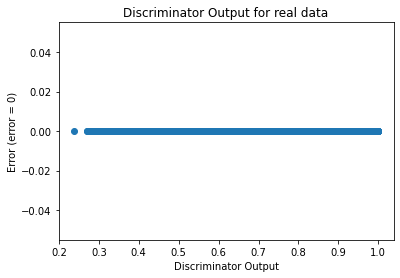

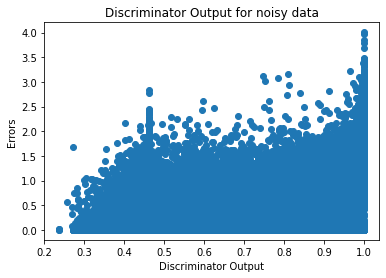

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
